# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [52]:
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import math
import calendar
import warnings
import os
import glob
import geopy.distance

warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
directory_name = 'datasets'

def download_filse():
    makedirs(directory_name)

    pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(directory_name))

    for year in range(2018,2020):    
        for month in range(1,13):

            year = str(year)
            month = str(month).zfill(2)

            # Stop in 04/2019 
            if year == '2019' and month == '05':
                break

            try:
                url = 'https://s3.amazonaws.com/fordgobike-data/' + year + month + '-fordgobike-tripdata.csv.zip'
                response = get(url)

                unzipping_file = ZipFile(BytesIO(response.content))
                unzipping_file.extractall(directory_name)
            
            except:
                print('Error!!')
                print(url)
                
            
# download_filse()

In [3]:
path = os.getcwd()  
print ("The current working directory is %s" % path)

The current working directory is C:\Users\al_ya\Desktop\dsND\Projects\Project 7\communicate-data-findings


In [4]:
path = path + '\{}'.format(directory_name)
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    if '2017-forgobike-tripdata.csv' not in filename:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

data18_df = pd.concat(li, axis=0, ignore_index=True) # data18_df it's also include 2019 tripdata.

In [5]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No
6,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes
7,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No
8,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No
9,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No


In [6]:
data17_df = pd.read_csv('datasets\\2017-forgobike-tripdata.csv')
data17_df.sample(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [7]:
data17_df.drop(['Unnamed: 0'], axis=1, inplace=True)
data17_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [8]:
df = data18_df.merge(data17_df, how='outer')
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [9]:
# df.to_csv('forgobike-tripdata.csv', index=False)

In [10]:
# df = pd.read_csv('forgobike-tripdata.csv', index_col=False)

In [11]:
print(len(data18_df.columns))
print(len(data17_df.columns))
print(len(df.columns))

16
15
16


In [12]:
not_in_2017data = []
for col in data17_df.columns:
    if col not in list(data18_df.columns):
        not_in_2018data.append(col)

not_in_2018data = []
for col in data18_df.columns:
    if col not in list(data17_df.columns):
        not_in_2017data.append(col)

        
check = lambda x: 'None' if not x else x

print("Columns in '2018&2019 Data' that don't appear '2017 Data' columns are {}".format(check(not_in_2017data)))
print("Columns in '2017 Data' that don't appear '2018&2019 Data' columns are {}".format(check(not_in_2018data)))

Columns in '2018&2019 Data' that don't appear '2017 Data' columns are ['bike_share_for_all_trip']
Columns in '2017 Data' that don't appear '2018&2019 Data' columns are None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 422.1+ MB


In [14]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,3.254325e+06,3.241824e+06,3.254325e+06,3.254325e+06,3.241824e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.036159e+06
mean,8.743223e+02,1.209191e+02,3.776880e+01,-1.223530e+02,1.191966e+02,3.776874e+01,-1.223519e+02,2.729018e+03,1.983137e+03
std,2.468547e+03,1.030184e+02,1.029275e-01,1.601559e-01,1.029334e+02,1.342571e-01,3.220803e-01,1.724443e+03,1.043760e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.000000e+01,1.878000e+03
25%,3.510000e+02,3.100000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.336000e+03,1.978000e+03
50%,5.570000e+02,8.800000e+01,3.778107e+01,-1.223983e+02,8.700000e+01,3.778127e+01,-1.223974e+02,2.579000e+03,1.985000e+03
75%,8.730000e+02,1.880000e+02,3.779539e+01,-1.222934e+02,1.860000e+02,3.779625e+01,-1.222935e+02,3.821000e+03,1.991000e+03
max,8.636900e+04,4.200000e+02,4.551000e+01,0.000000e+00,4.200000e+02,4.551000e+01,0.000000e+00,7.108000e+03,2.001000e+03


In [15]:
df.shape

(3254325, 16)

In [16]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          218166
member_gender              217733
bike_share_for_all_trip    519700
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df['member_age'] = 2019 - df['member_birth_year']

In [19]:
df['user_type'].value_counts()

Subscriber    2747580
Customer       506745
Name: user_type, dtype: int64

In [20]:
df.member_age.describe()

count    3.036159e+06
mean     3.586325e+01
std      1.043760e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.400000e+01
75%      4.100000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [215]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(20,7)})
base_color = sns.color_palette()[0]

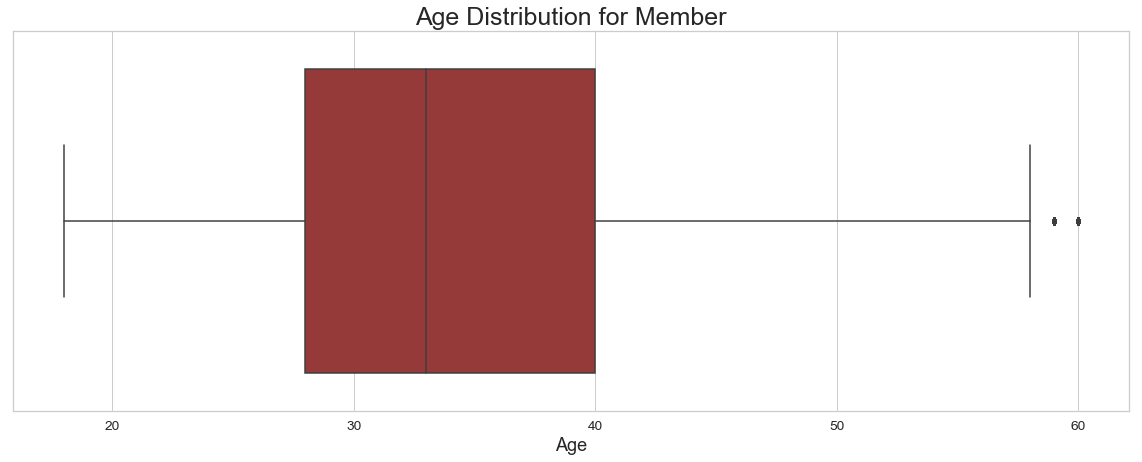

In [69]:
ax = sns.boxplot(x=df["member_age"], color='brown')
ax.set_xlabel('Age', fontsize=18)
ax.set_title("Age Distribution for Member", fontsize=25);

In [22]:
df.drop(df[df.member_age > 60].index, inplace=True)

In [48]:
df['member_age'].describe()

count    2.959104e+06
mean     3.505000e+01
std      9.125958e+00
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      6.000000e+01
Name: member_age, dtype: float64

In [24]:
def category(age):
    if 10<age<=20:
        return '11-20'
    
    elif 20<age<=30:
        return '21-30'  
    
    elif 30<age<=40:
        return '31-40'
    
    elif 40<age<=50:
        return '41-50'
    
    elif 50<age<=60:
        return '51-60'

df['age_category'] = df['member_age'].apply(category)



I divided members age into 5 categories.
* 11-20
* 21-30
* 31-40
* 41-50
* 51-60

In [25]:
df['age_category'].value_counts()

31-40    1177345
21-30    1020394
41-50     473494
51-60     249878
11-20      37993
Name: age_category, dtype: int64

In [26]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [27]:
df['start_time_month'] = df['start_time'].dt.strftime('%B')
df['start_time_monthly'] = df['start_time'].dt.strftime('%y-%m') # Ex. 2019-04-07 >> 19-04 
df['start_time_day']=df['start_time'].dt.strftime('%A')
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour
df['duration_min'] = (df['duration_sec']/60).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177270 entries, 0 to 3254324
Data columns (total 24 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
member_age                 float64
age_category               object
start_time_month           object
start_time_monthly         object
start_time_day             object
start_time_hour            int64
end_time_hour              int64
duration_min               float64
dtypes: datetime64[ns](2), float64(9), int64(4), o

In [28]:
def calculate_distance(x_start, y_start, x_end, y_end):
    coords_1 = (x_start, y_start)
    coords_2 = (x_end, y_end)

    return geopy.distance.vincenty(coords_1, coords_2).km

In [29]:
df['distance_km'] = df.apply(lambda x: calculate_distance(x['start_station_latitude'], x['start_station_longitude'],
                                                           x['end_station_latitude'], x['end_station_longitude']), axis=1)


In [30]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,age_category,start_time_month,start_time_monthly,start_time_day,start_time_hour,end_time_hour,duration_min,distance_km
742141,717,2018-06-13 08:56:05.872,2018-06-13 09:08:03.167,16.0,Steuart St at Market St,37.794130,-122.394430,50.0,2nd St at Townsend St,37.780526,...,No,46.0,41-50,June,18-06,Wednesday,8,9,11.950000,1.553396
423114,354,2018-04-05 16:14:29.578,2018-04-05 16:20:23.910,208.0,S. 4th St at San Carlos St,37.332836,-121.883912,275.0,Julian St at 6th St,37.342997,...,No,56.0,51-60,April,18-04,Thursday,16,16,5.900000,1.210940
128982,216,2018-02-19 10:26:20.828,2018-02-19 10:29:57.528,19.0,Post St at Kearny St,37.788975,-122.403452,13.0,Commercial St at Montgomery St,37.794231,...,No,41.0,41-50,February,18-02,Monday,10,10,3.600000,0.585235
1172706,434,2018-08-07 09:19:44.067,2018-08-07 09:26:58.354,85.0,Church St at Duboce Ave,37.770083,-122.429156,59.0,S Van Ness Ave at Market St,37.774814,...,No,33.0,31-40,August,18-08,Tuesday,9,9,7.233333,1.040946
1492190,452,2018-10-17 06:16:45.144,2018-10-17 06:24:17.144,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,No,31.0,31-40,October,18-10,Wednesday,6,6,7.533333,1.813432
3044773,841,2017-09-25 18:20:49.154,2017-09-25 18:34:50.244,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24.0,Spear St at Folsom St,37.789677,...,NaN,27.0,21-30,September,17-09,Monday,18,18,14.016667,1.515141
3054742,794,2017-09-22 12:19:04.995,2017-09-22 12:32:19.572,116.0,Mississippi St at 17th St,37.764802,-122.394771,50.0,2nd St at Townsend St - Coming Soon,37.780526,...,NaN,45.0,41-50,September,17-09,Friday,12,12,13.233333,1.789359
1158055,374,2018-08-09 09:16:06.995,2018-08-09 09:22:21.118,80.0,Townsend St at 5th St,37.775306,-122.397380,36.0,Folsom St at 3rd St,37.783830,...,No,55.0,51-60,August,18-08,Thursday,9,9,6.233333,0.955183
1292850,2190,2018-09-18 09:43:04.192,2018-09-18 10:19:34.797,343.0,Bryant St at 2nd St,37.783172,-122.393572,22.0,Howard St at Beale St,37.789756,...,No,42.0,41-50,September,18-09,Tuesday,9,10,36.500000,0.736839
2087745,422,2019-02-24 15:34:09.660,2019-02-24 15:41:11.998,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,No,37.0,31-40,February,19-02,Sunday,15,15,7.033333,0.000000


In [31]:
df.shape

(3177270, 25)

In [32]:
df.duplicated().sum()

0

In [33]:
len(df)

3177270

In [34]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'age_category', 'start_time_month', 'start_time_monthly',
       'start_time_day', 'start_time_hour', 'end_time_hour', 'duration_min',
       'distance_km'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177270 entries, 0 to 3254324
Data columns (total 25 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
member_age                 float64
age_category               object
start_time_month           object
start_time_monthly         object
start_time_day             object
start_time_hour            int64
end_time_hour              int64
duration_min               float64
distance_km                float64
dtypes: datetim

### What is the structure of your dataset?

The forgobike trip data are 3,177,270 rides that happend in 2017, 2018 and 2019(until May). The dataset contain features about:

* Trip duration: 
    * Start and End time
    * How long the trip take in seconds (duration)
    <br /><br />
    * Added by me:
        * Start time - month's name
        * Start time - day's name
        * Start and End time in hours (number)
        * How long the trip take in minutes
<br /><br /> 
* Stations: 
    * Start and End stations IDs
    * Start and End stations names
    * Start and End stations latitude
    * Start and End stations longitude
    <br /><br />
    * Added by me:
        * Distance in km
<br /><br />
* Customer data: 
    * Gender
    * Birth date
    * User type
    <br /><br />

    * Added by me:
        * Member age
<br /><br />
* Bike: 
   * Bike id
<br /><br />

### What is/are the main feature(s) of interest in your dataset?

The main features are about behaviors of users..Like Where did he start and where did he end, and when?<br /> Also:
* Average distance 
* Average duration
* Any day? month?
* Any time of day?
* Average age of users, and what most user type are used.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features that I think will help me are start and end time, distance, latitude and longitude to understand the behaviors of users

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### 1. The Monthly Usage of Bike Rides

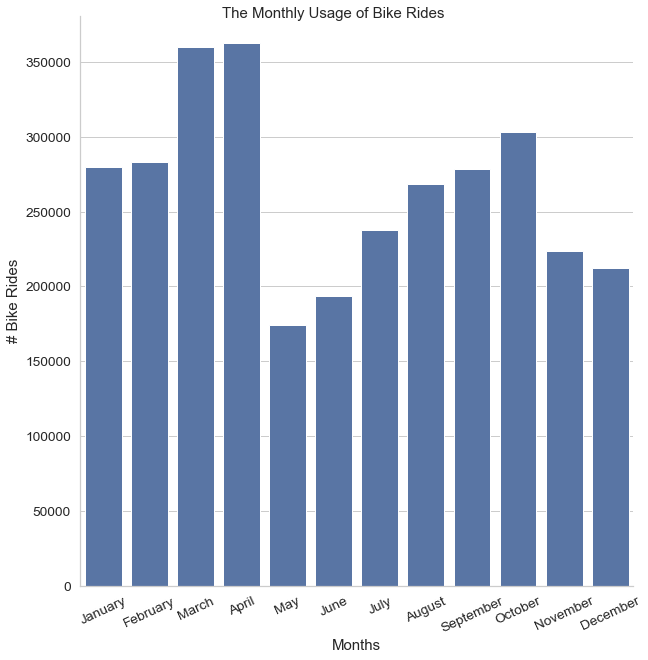

In [37]:
lm  = sns.catplot(data=df, x='start_time_month', kind='count', color = base_color, height = 9)
lm.set_axis_labels("Months", "# Bike Rides")
lm.set_xticklabels(rotation=25)
lm.fig.suptitle('The Monthly Usage of Bike Rides', fontsize=15);

In [38]:
df[df.start_time_month == 'April'].count()[0]

362690

The above figure show number of rides for each month. And we can see April is has the highest number of rides (trips) 362,690 rides.

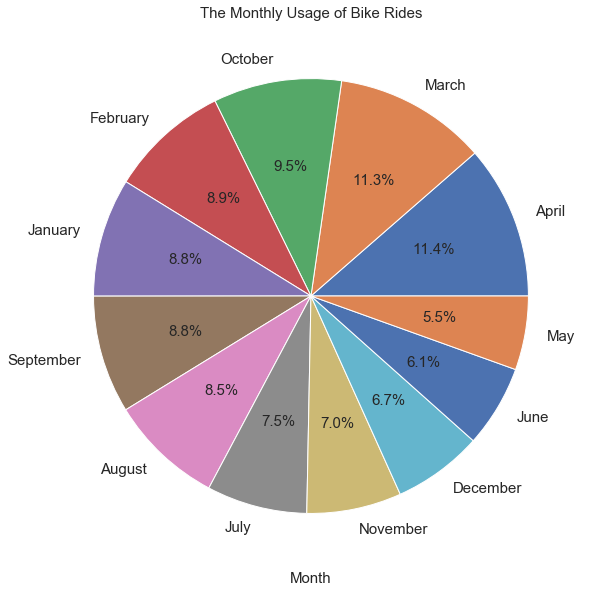

In [39]:
df.start_time_month.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.1f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Month')
ax.set_title("The Monthly Usage of Bike Rides", fontsize=15);

The above figure show percentage of rides for each month. And we can see April and March are have the highest number of rides (trips) 

### 2. The Daily Usage of Bike Rides

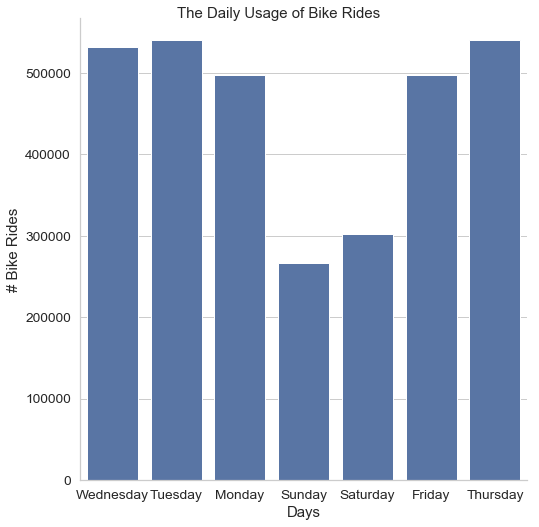

In [40]:
lm  = sns.catplot(data=df, x='start_time_day', kind='count', color = base_color, height = 7.5)
lm.set_axis_labels("Days", "# Bike Rides")

lm.fig.suptitle('The Daily Usage of Bike Rides', fontsize=15);

The previous figure it is show the number of rides (trips) per day, and we can see the weekend it is has the lowest number of rides, and the weekdays rides are close to each other.  

### 3. Number of Bike Rides Per Day

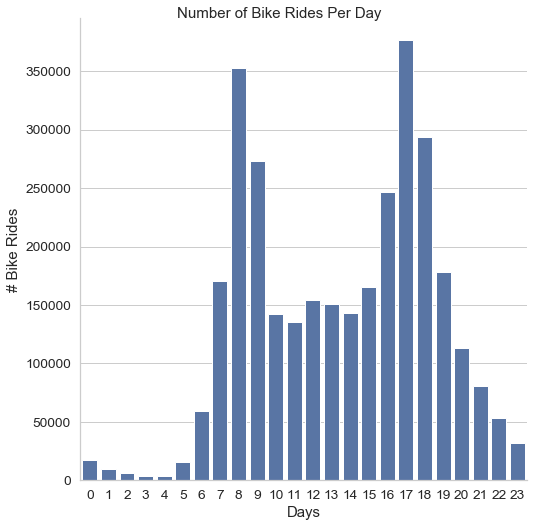

In [41]:
lm  = sns.catplot(data=df, x='start_time_hour', kind='count', color = base_color, height = 7.5)
lm.set_axis_labels("Days", "# Bike Rides")

lm.fig.suptitle('Number of Bike Rides Per Day', fontsize=15);

The previous figure it is show the number of rides (trips) for each hour, so we can see 8.AM and 5.PM it is has the highest number of rides and that because the work hours (start and end work). Also we can see the rides between 12.AM and 5.AM has the lowest number of rides and that hours sleep.

### 4. Number of Bike Rides Over Time

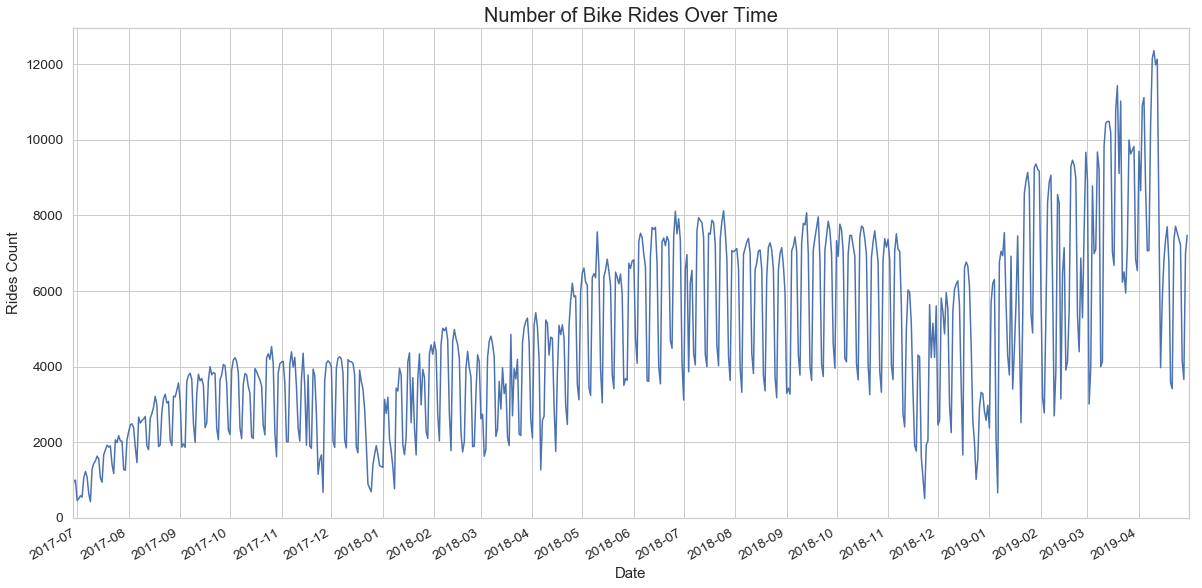

In [42]:
df.groupby(df['start_time'].dt.date).size().plot(figsize=(20,10))
ax = plt.gca()
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date')
ax.set_xlim([df.start_time.min(), df.start_time.max()])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Show x-axis as month by month (monthly)
ax.set_ylim(0)
ax.set_title("Number of Bike Rides Over Time", fontsize=20);
plt.gcf().autofmt_xdate()

The previous figure it is show the number of rides (trips) over time. We can see the number of trips are increased. <br>
From November to February the number of trips was decreased may be because the Winter season.

### 5. Number & Percentage of Bike Rides for 11 to 60 Years Old

In [44]:
nm_category_df = df.groupby('age_category').agg({'bike_id':'count'})
nm_category_df['percentage'] = (nm_category_df['bike_id']/nm_category_df['bike_id'].sum())*100
nm_category_df

,bike_id,percentage
age_category,,
11-20,37993,1.283936
21-30,1020394,34.483208
31-40,1177345,39.787213
41-50,473494,16.001263
51-60,249878,8.444380


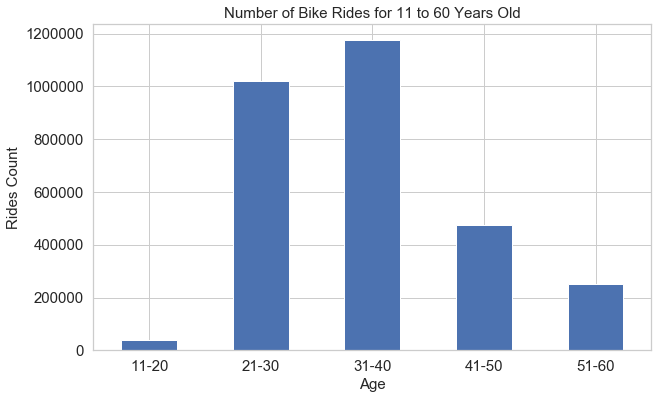

In [140]:
nm_category_df.bike_id.plot(kind='bar', figsize=(10,6),fontsize =15, color=base_color)

plt.xticks(rotation=0)
ax = plt.gca()
ax.set_ylabel('Rides Count')
ax.set_xlabel('Age')
ax.set_title("Number of Bike Rides for 11 to 60 Years Old", fontsize=15);

The previous figure it is show the number of rides (trips) per month for each age categories. <br>
in Bivariate Exploration section I will show the number of rides based on age over time

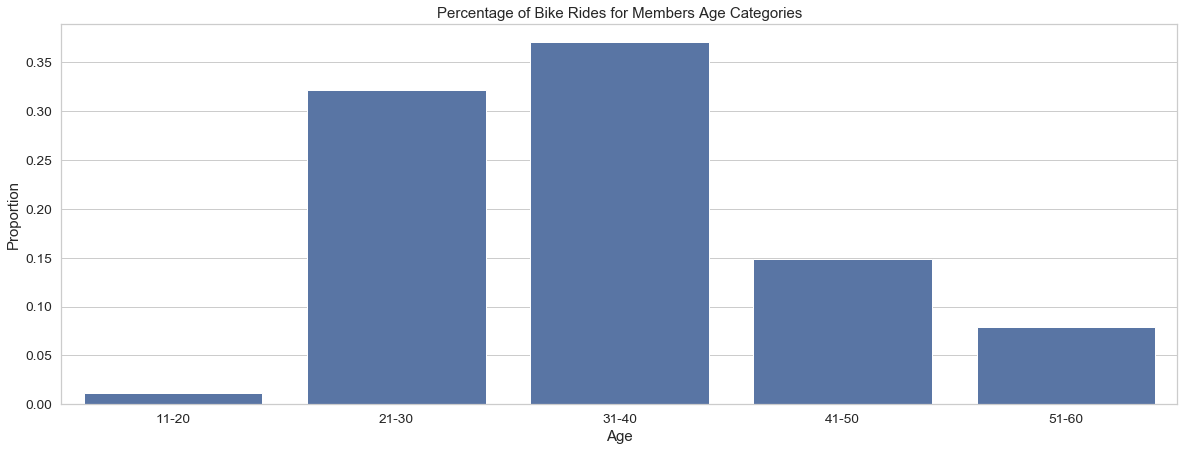

In [216]:
n_points = df.shape[0]

max_count_age = df['age_category'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

my_order = ['11-20', '21-30', '31-40', '41-50', '51-60']
sns.countplot(data=df, x='age_category', color=base_color, order=my_order)

ax = plt.gca()
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('Age')
ax.set_title("Percentage of Bike Rides for Members Age Categories", fontsize=15);

The previous figure it is show the number of rides (trips) for each members age categories. So, we can see 21-30 and 31-40 categories are the highest with 74.2%.

### 6. Percentage of Bike Rides for Members Gender

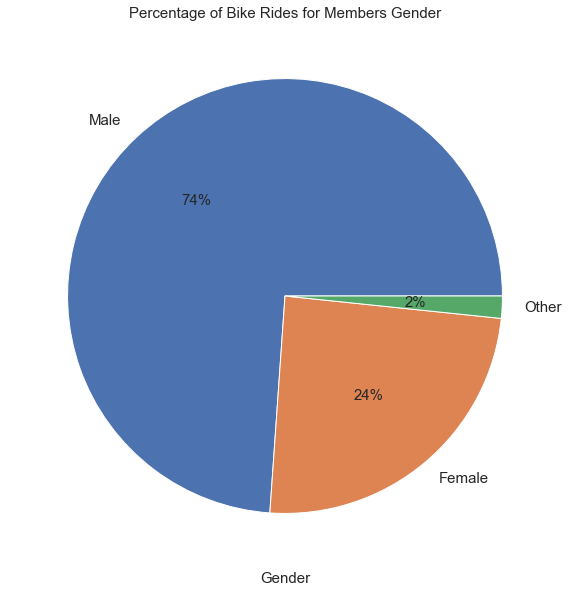

In [50]:
# max_count_gender = df['member_gender'].value_counts().max()
# max_prop_gender = max_count_gender / n_points

# tick_props_gender = np.arange(0, max_prop_gender, 0.05)
# tick_names_gender = ['{:0.2f}'.format(v) for v in tick_props_gender]

# sns.countplot(data=df, x='member_gender', color=base_color)

# ax = plt.gca()
# plt.yticks(tick_props_gender * n_points, tick_names_gender)
# ax.set_ylabel('Proportion')
# ax.set_xlabel('Member Gender')
# ax.set_title("Percentage of Bike Rides for Members Gender", fontsize=15);

df.member_gender.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.0f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Gender')
ax.set_title("Percentage of Bike Rides for Members Gender", fontsize=15);


The previous figure it is show the percentage of rides (trips) for members gender. So, we can see male gender is the highest with 73.9%. <br>
In Bivariate Exploration section I will show the number of rides based on the gender over time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  I cleand all variables that need to clean like change the date to datetime object. So, I think my dataset is ready to visualization. <br> I didn't have any unusual points. Everything was normal like at the weedend the rides was decreased and on the sleeping tims as well.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

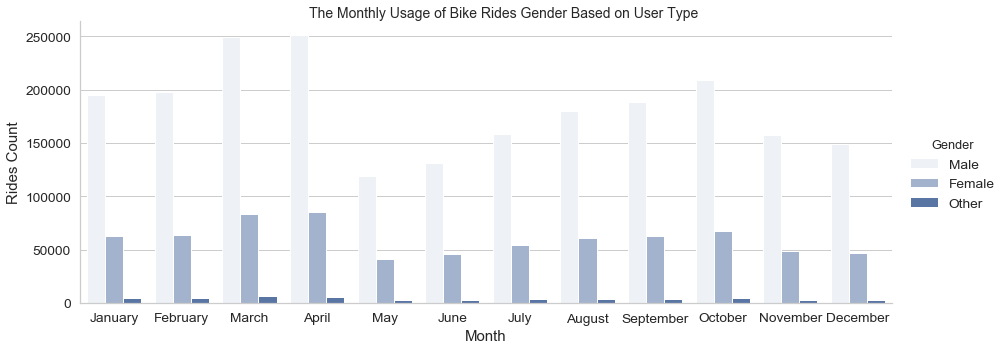

In [220]:
lm = sns.catplot(data=df, x='start_time_month', hue='member_gender', kind='count',aspect=20.7/8.27, color=base_color)

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

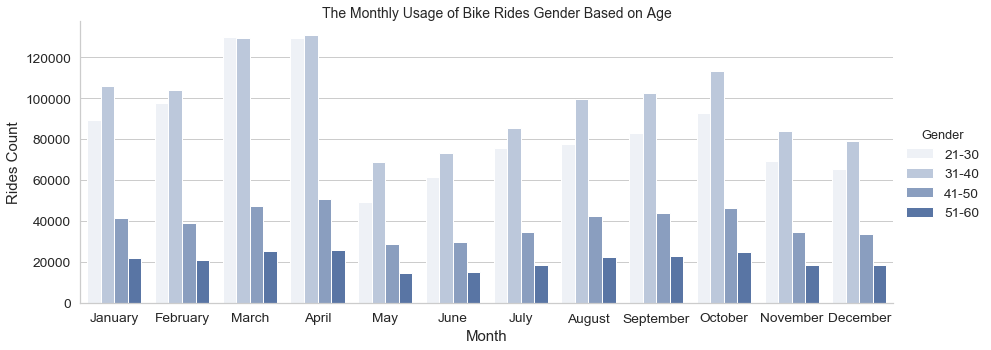

In [231]:
my_order = ['21-30', '31-40', '41-50', '51-60']
lm = sns.catplot(data=df, x='start_time_month', hue='age_category', kind='count',aspect=20.7/8.27, color=base_color,
                hue_order=my_order)

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('Age')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on Age', fontsize=14);

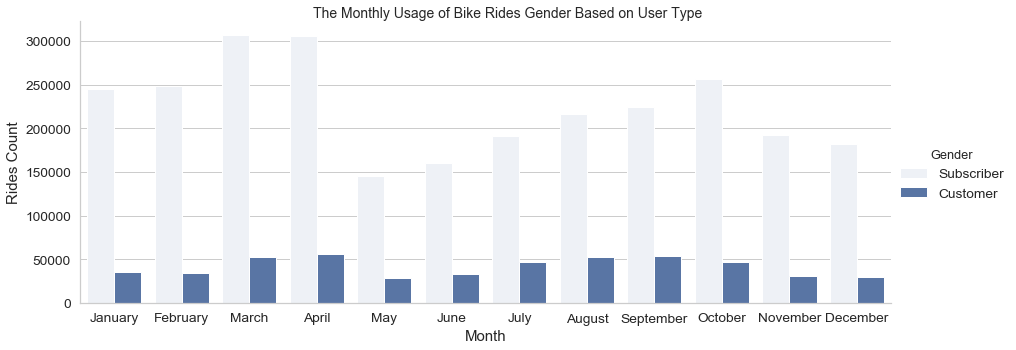

In [234]:
my_order = ['21-30', '31-40', '41-50', '51-60']
lm = sns.catplot(data=df, x='start_time_month', hue='user_type', kind='count',aspect=20.7/8.27, color=base_color)

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('User Type')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', fontsize=14);

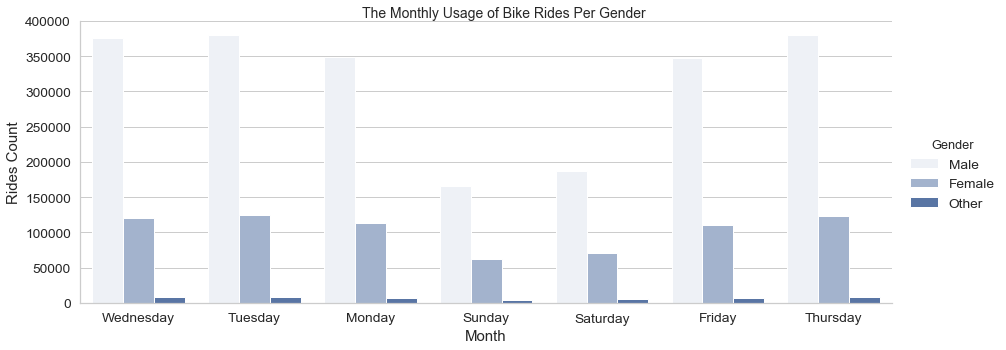

In [236]:
lm = sns.catplot(data=df, x='start_time_day', hue='member_gender', kind='count',aspect=20.7/8.27, color=base_color)

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

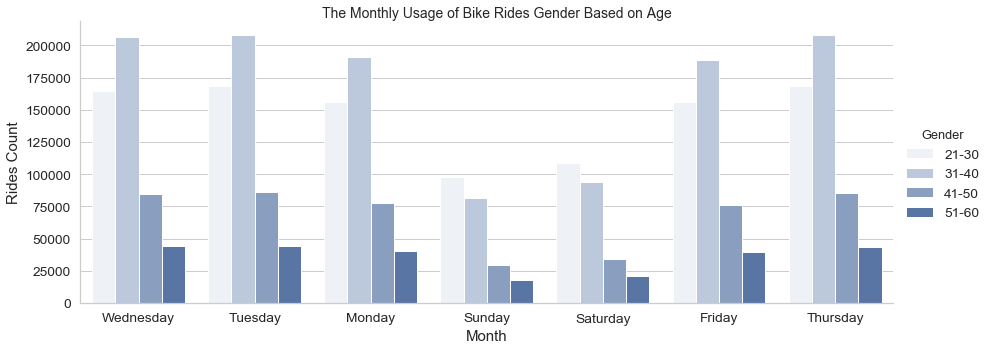

In [237]:
lm = sns.catplot(data=df, x='start_time_day', hue='age_category', kind='count',aspect=20.7/8.27, color=base_color,
                hue_order=my_order)

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('Age')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on Age', fontsize=14);


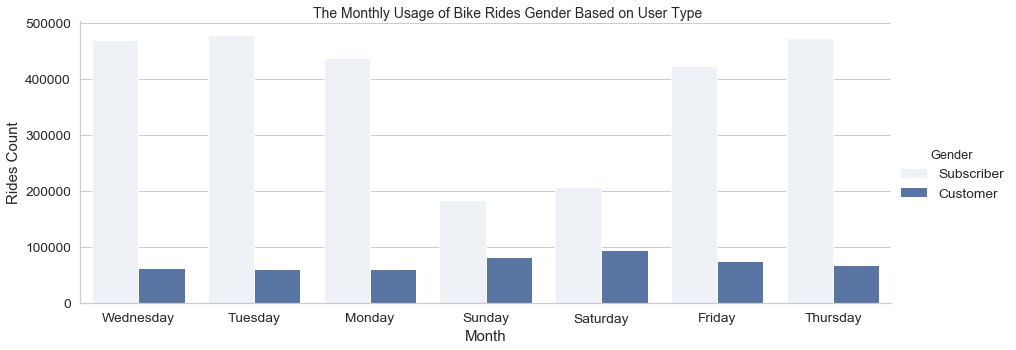

In [238]:
lm = sns.catplot(data=df, x='start_time_day', hue='user_type', kind='count',aspect=20.7/8.27, color=base_color)

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('User Type')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', fontsize=14);

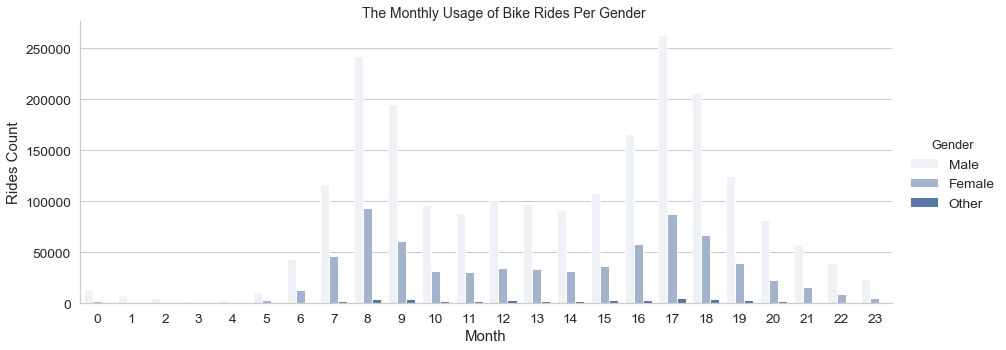

In [239]:
lm = sns.catplot(data=df, x='start_time_hour', hue='member_gender', kind='count',aspect=20.7/8.27, color=base_color)

lm.set_axis_labels('Hour', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

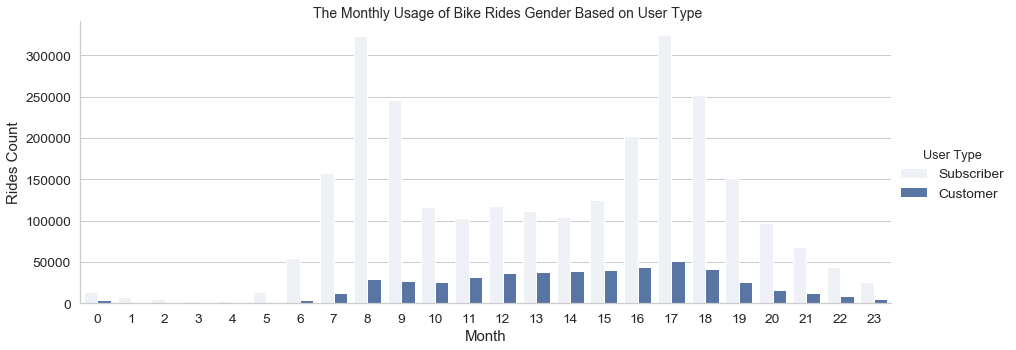

In [241]:
lm = sns.catplot(data=df, x='start_time_hour', hue='user_type', kind='count',aspect=20.7/8.27, color=base_color)

lm.set_axis_labels('Hour', 'Rides Count')
lm._legend.set_title('User Type')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', fontsize=14);

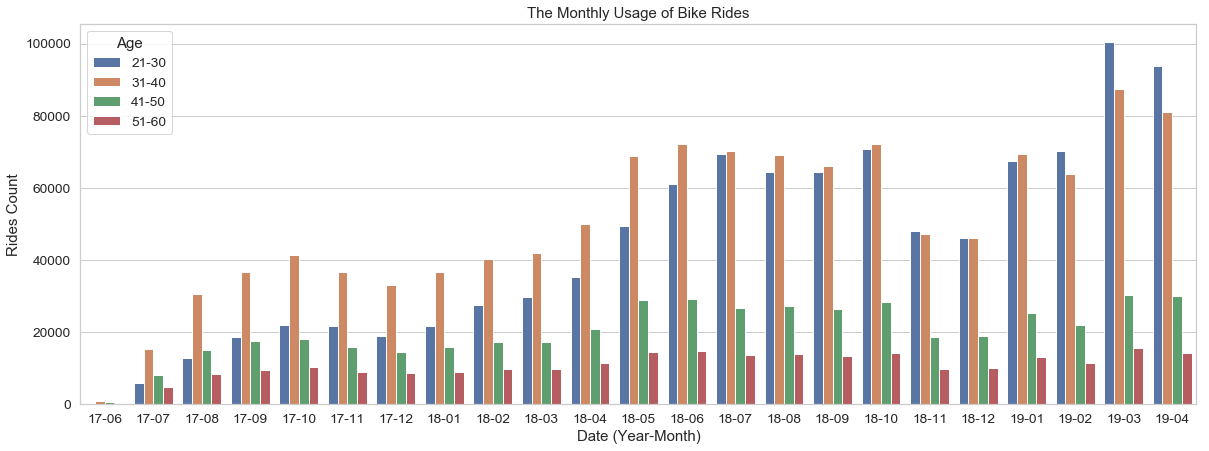

In [242]:
ax = sns.countplot(x='start_time_monthly', hue='age_category', hue_order=my_order,
                   data=df[df['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])]
                   .sort_values(by=['start_time_monthly']))

ax.legend().set_title('Age')
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date (Year-Month)')
ax.set_title("The Monthly Usage of Bike Rides", fontsize=15);

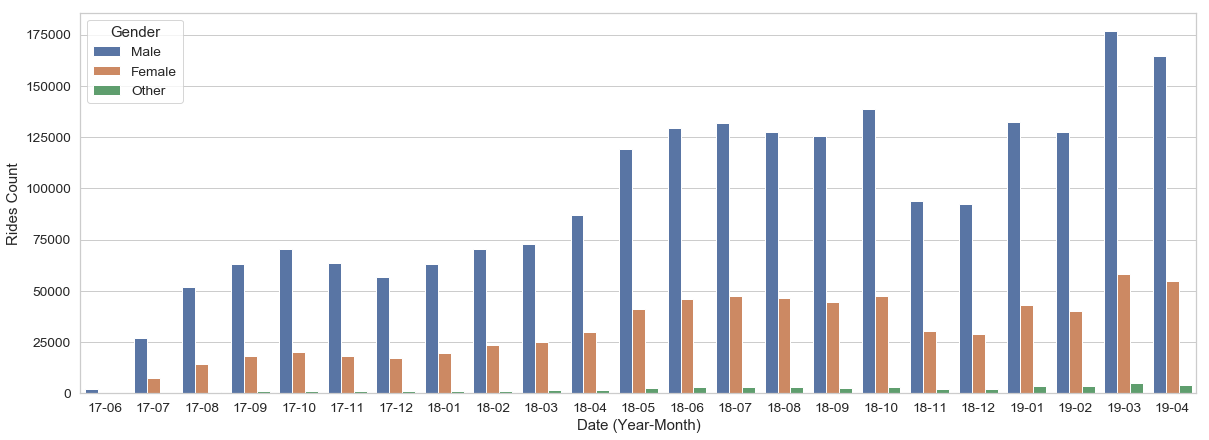

In [196]:
ax = sns.countplot(x='start_time_monthly', hue='member_gender', 
                   data=df.sort_values(by=['start_time_monthly']))

ax = plt.gca()
ax.legend().set_title('Gender')
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date (Year-Month)')
lm.fig.suptitle('The Monthly Usage of Bike Rides', fontsize=15);

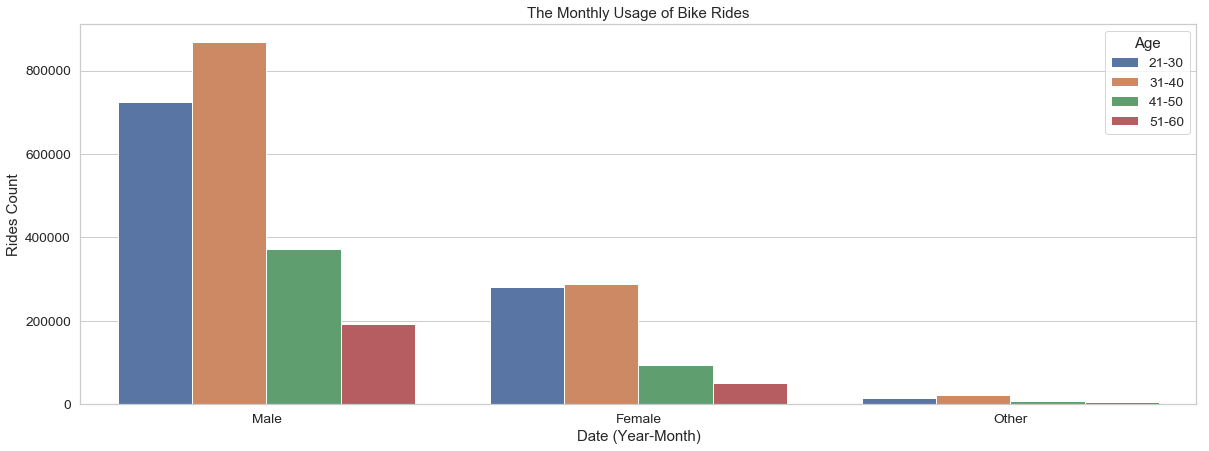

In [224]:
ax = sns.countplot(x='member_gender', hue='age_category', hue_order=my_order,
                   data=df[df['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])]
                   .sort_values(by=['start_time_monthly']))

ax.legend().set_title('Age')
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date (Year-Month)')
ax.set_title("The Monthly Usage of Bike Rides", fontsize=15);

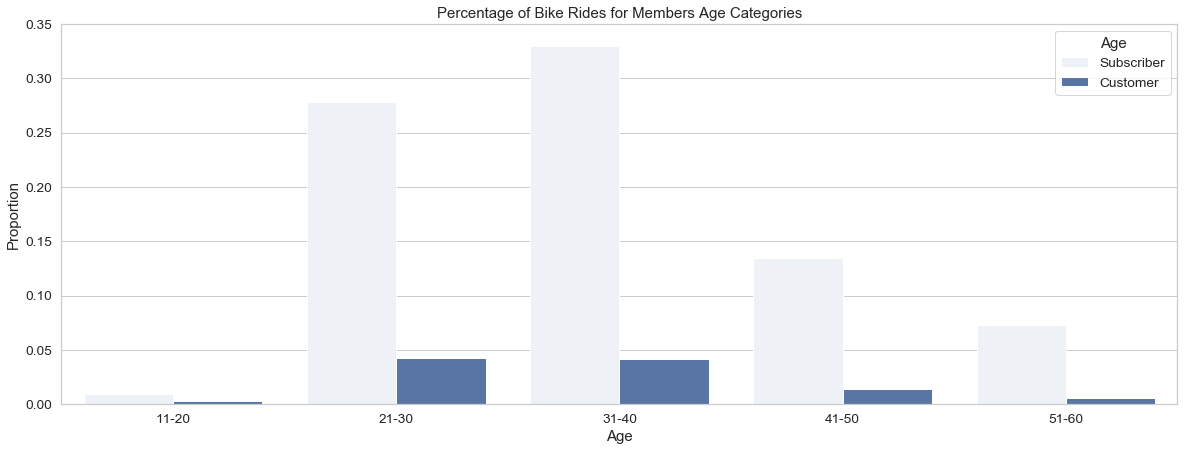

In [199]:
n_points = df.shape[0]

max_count_age = df['age_category'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

my_order = ['11-20', '21-30', '31-40', '41-50', '51-60']
sns.countplot(data=df, x='age_category', hue='user_type', color=base_color, order=my_order)

ax = plt.gca()
ax.legend().set_title('User Type')
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('Age')
ax.set_title("Percentage of Bike Rides for Members Age Categories", fontsize=15);

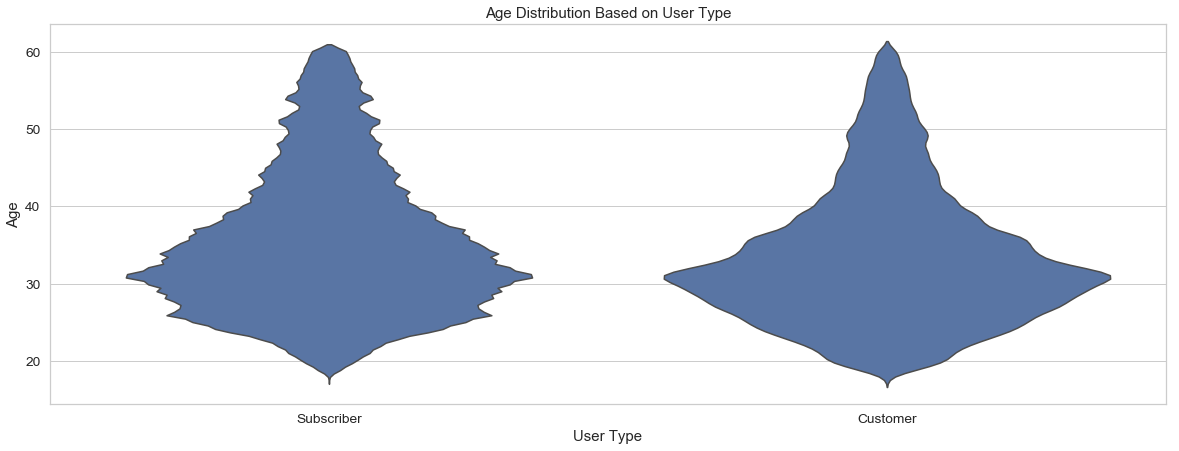

In [72]:
sns.violinplot(data=df, x='user_type', y='member_age', color=base_color, inner=None, height=12)

ax = plt.gca()
ax.set_ylabel('Age')
ax.set_xlabel('User Type')
ax.set_title("Age Distribution Based on User Type", fontsize=15);

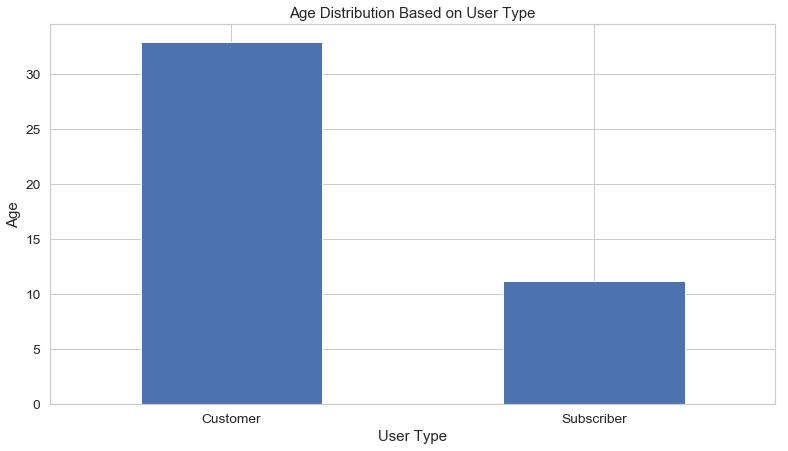

In [139]:
ax = plt.gca()

df.groupby('user_type')['duration_min'].mean().plot(kind='bar', color=base_color, figsize=(13,7), ax=ax)

plt.xticks(rotation=0)
ax.set_ylabel('Age')
ax.set_xlabel('User Type')
ax.set_title("Age Distribution Based on User Type", fontsize=15);

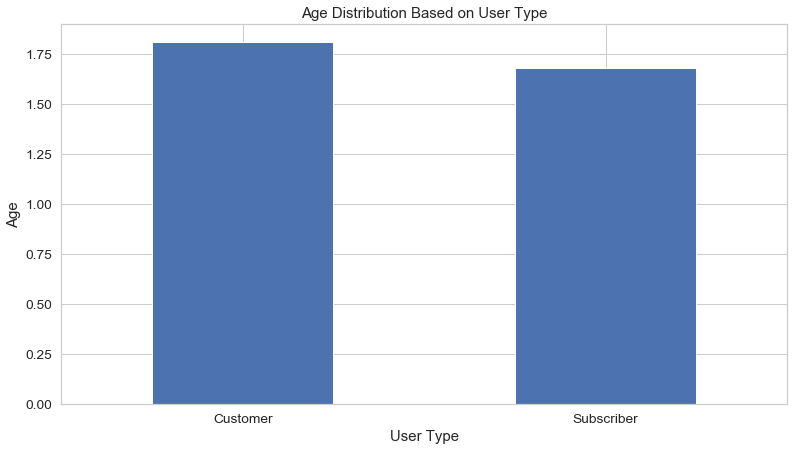

In [141]:
ax = plt.gca()

df.groupby('user_type')['distance_km'].mean().plot(kind='bar', color=base_color, figsize=(13,7), ax=ax)

plt.xticks(rotation=0)
ax.set_ylabel('Age')
ax.set_xlabel('User Type')
ax.set_title("Age Distribution Based on User Type", fontsize=15);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

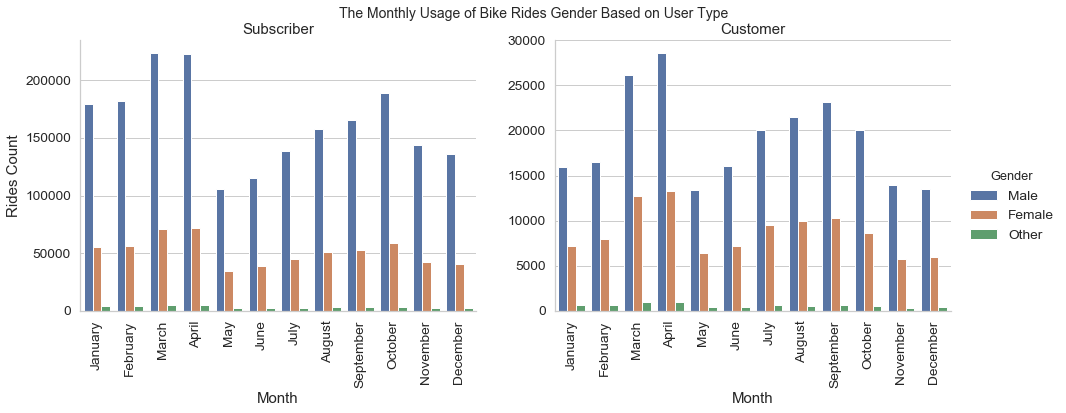

In [257]:
lm = sns.catplot(data=df, x='start_time_month', col="user_type", hue='member_gender', kind='count', aspect=20/15,
                 sharey=False)

lm.set_axis_labels('Month', 'Rides Count')
lm.set_xticklabels(rotation=90)
lm._legend.set_title('Gender')
lm.set_titles('{col_name}')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', y=1.00, fontsize=14);

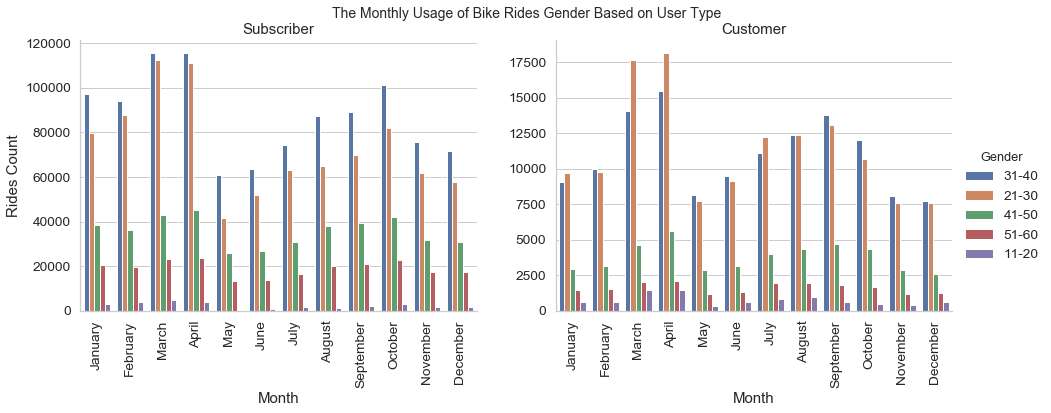

In [256]:
lm = sns.catplot(data=df, x='start_time_month', col="user_type", hue='age_category', kind='count', aspect=20/15,
                 sharey=False)

lm.set_axis_labels('Month', 'Rides Count')
lm.set_xticklabels(rotation=90)
lm._legend.set_title('Gender')
lm.set_titles('{col_name}')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', y=1.00, fontsize=14);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

1. https://stackabuse.com/creating-and-deleting-directories-with-python/
2. https://seaborn.pydata.org/generated/seaborn.boxplot.html
3. https://stackoverflow.com/questions/34279378/python-pandas-apply-function-with-two-arguments-to-columns?rq=1
4. https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude